In [108]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [109]:
#import processed data
NYSE_Weather = pd.read_csv('../data/NYSE_Weather.csv')
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,09:20:42,0.3,54.6,0.000,none,0.0,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,09:21:36,-1.1,58.1,1.247,"rain,snow",0.0,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,09:24:39,2.9,78.3,0.000,none,0.0,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,09:25:46,-1.5,57.0,0.000,none,0.0,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,09:26:59,-7.9,51.4,0.000,none,0.0,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [110]:
NYSE_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9802 non-null   object 
 1   Open               9802 non-null   float64
 2   Close              9802 non-null   float64
 3   Volume             9802 non-null   float64
 4   Returns            9802 non-null   float64
 5   Hours_of_Sunlight  9802 non-null   object 
 6   temp               9802 non-null   float64
 7   humidity           9802 non-null   float64
 8   precip             9802 non-null   float64
 9   preciptype         9802 non-null   object 
 10  snow               9802 non-null   float64
 11  windspeed          9802 non-null   float64
 12  cloudcover         9802 non-null   float64
 13  visibility         9802 non-null   float64
 14  sunrise            9802 non-null   object 
 15  sunset             9802 non-null   object 
 16  conditions         9802 

In [111]:
NYSE_Weather.describe()

,Open,Close,Volume,Returns,temp,humidity,precip,snow,windspeed,cloudcover,visibility
count,9802.000000,9802.000000,9.802000e+03,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000
mean,7037.140698,7037.630505,2.007240e+09,0.034336,13.264599,63.843481,2.867549,0.002785,23.250663,55.395297,16.075423
std,4253.515223,4253.702605,2.026211e+09,1.109115,9.372474,14.892222,7.880304,0.105242,7.440765,29.704758,5.383133
min,1000.270020,1000.270020,0.000000e+00,-19.173303,-17.100000,19.300000,0.000000,0.000000,6.700000,0.000000,1.000000
25%,2723.847473,2723.847473,0.000000e+00,-0.417517,5.700000,52.700000,0.000000,0.000000,17.900000,31.000000,13.800000
50%,6698.145019,6698.159912,1.527440e+09,0.064410,13.500000,63.000000,0.000000,0.000000,22.200000,55.900000,15.900000
75%,10057.235107,10064.095215,3.686898e+09,0.537075,21.600000,74.900000,1.423000,0.000000,27.400000,81.800000,16.000000
max,17353.759766,17353.759766,1.145623e+10,12.216238,34.200000,99.800000,156.355000,8.400000,66.600000,100.000000,39.700000


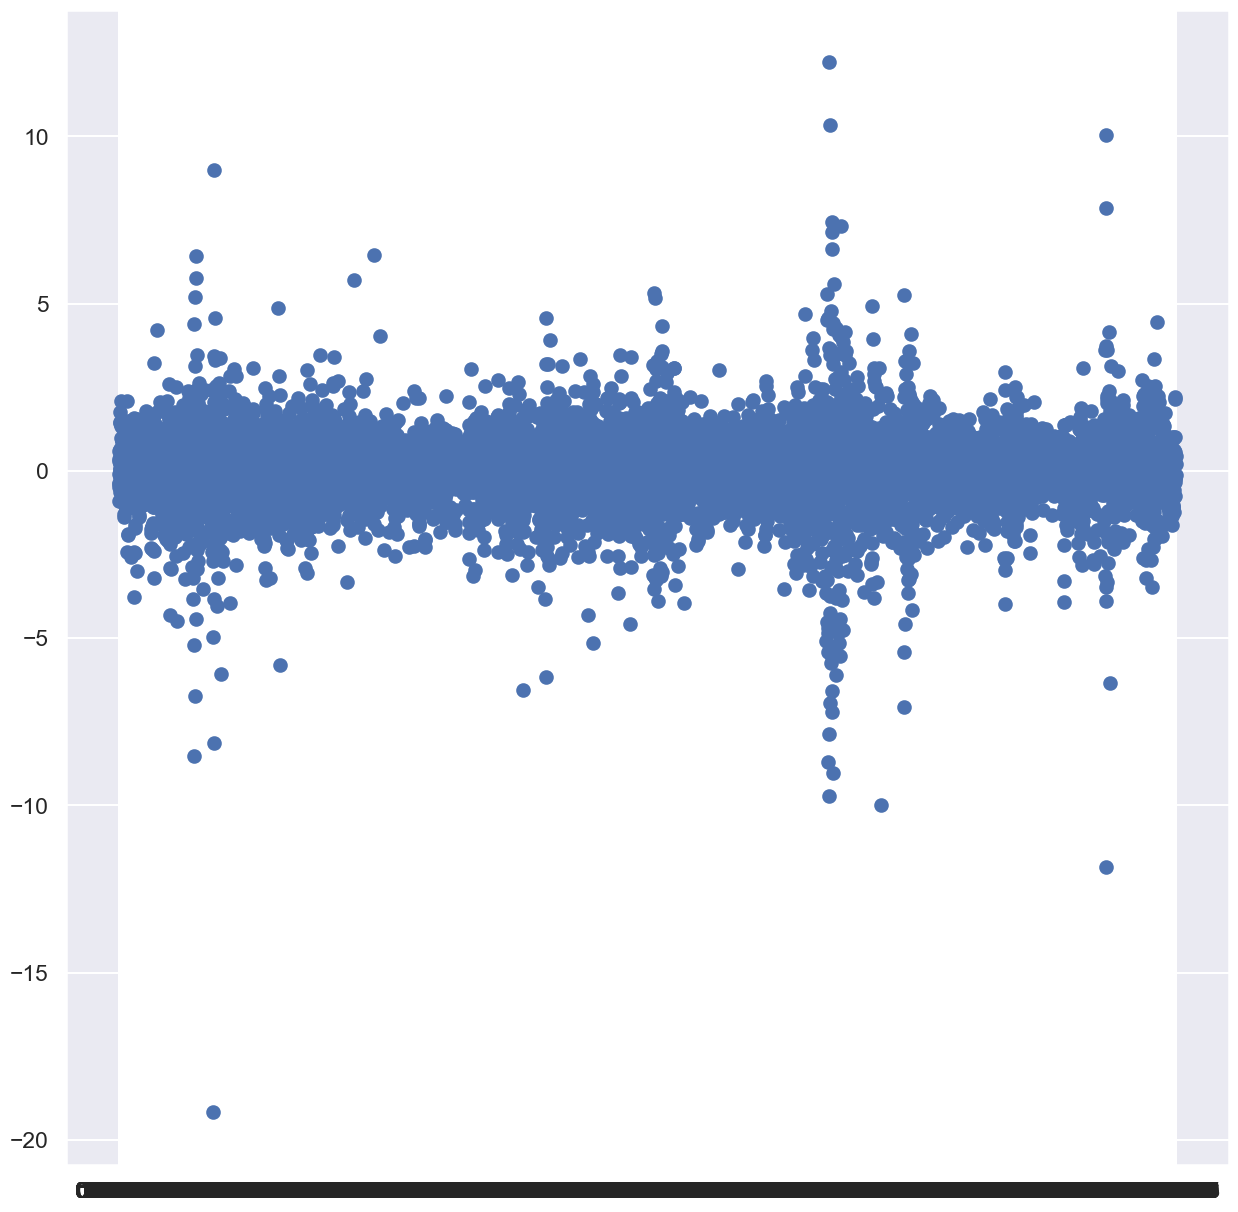

In [112]:
#scatter returns on hours of sunlight
plt.figure(figsize=(15,15))

plt.scatter(x=NYSE_Weather['Hours_of_Sunlight'], y=NYSE_Weather['Returns'])

### Calculating Average Monthly Returns and Hours of Sunlight (both with and without outliers)

In [113]:
#Converting the dates column from string to datetime
NYSE_Weather['Date'] =  pd.to_datetime(NYSE_Weather['Date'])

In [ ]:
#removing outliers 
q1 = NYSE_Weather['Returns'].quantile(0.25)
q3 = NYSE_Weather['Returns'].quantile(0.75)
IQR = q3 - q1

#defining boundaries
lowerBound = q1 - IQR*1.5
upperBound = q3 + IQR*1.5

#creating dataframe without outliers to calculate averages
NYC_no_outliers = NYSE_Weather[(NYSE_Weather['Returns'] >= lowerBound) & (NYSE_Weather['Returns'] <= upperBound)]
NYC_no_outliers['HOS_Numeric'] = pd.to_timedelta(NYC_no_outliers['Hours_of_Sunlight']).dt.total_seconds() / 3600

Text(0.5, 1.0, 'Dist. of Returns w/o Outliers')

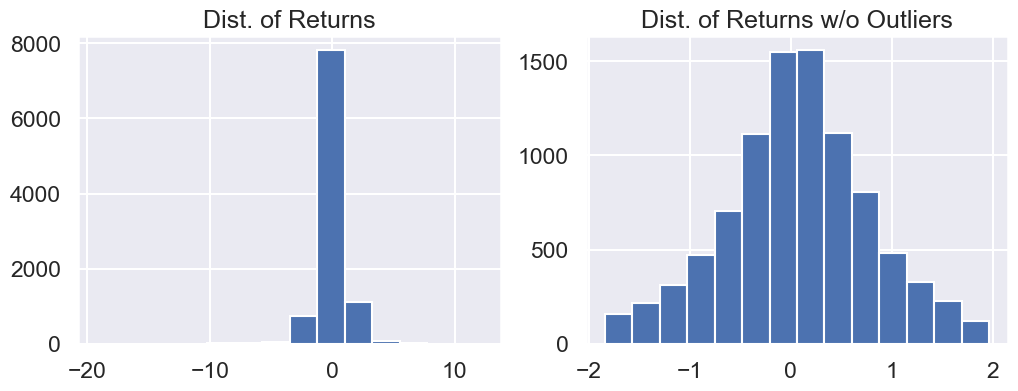

In [137]:
#Distribution of returns (w/ and w/o outliers)
sns.set_theme(style = 'darkgrid', context = 'talk')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(NYSE_Weather['Returns'], bins = 14)
axes[0].set_title('Dist. of Returns')

axes[1].hist(NYC_no_outliers['Returns'], bins = 14)
axes[1].set_title('Dist. of Returns w/o Outliers')

# Much more resembles a normal distribution after removing outliers

Average Monthly Returns

In [119]:
#Calculating average monthly returns (includes outliers)
avg_return = NYSE_Weather['Returns'].groupby(NYSE_Weather['Date'].dt.month).mean()

#average monthly return w/o outliers
avg_return_NO = NYC_no_outliers['Returns'].groupby(NYC_no_outliers['Date'].dt.month).mean()

Average Hours of Sunlight by Month

In [ ]:
# Convert 'Hours_of_Sunlight' to timedelta
NYSE_Weather['Hours_of_Sunlight'] = pd.to_timedelta(NYSE_Weather['Hours_of_Sunlight'])

# Group by month and calculate the mean
avg_sunlight = NYSE_Weather.groupby(NYSE_Weather['Date'].dt.month)['Hours_of_Sunlight'].mean()

#Converting timedeltas into fractions of hours
avg_sunlight_hours = avg_sunlight.dt.total_seconds() / 3600


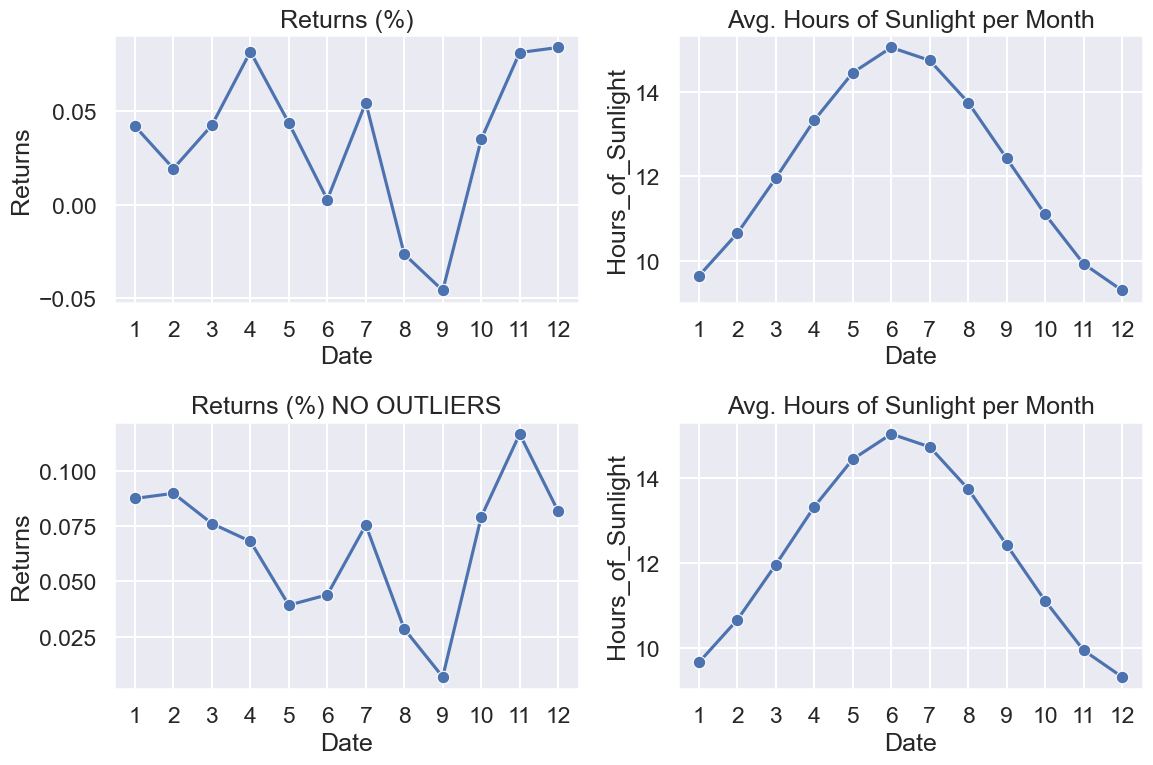

In [125]:
# Returns vs Sunlight
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.lineplot(ax=axes[0,0], data= avg_return, marker='o')
sns.lineplot(ax=axes[0,1], data= avg_sunlight_hours, marker='o')
sns.lineplot(ax=axes[1,0], data= avg_return_NO, marker='o')
sns.lineplot(ax=axes[1,1], data= avg_sunlight_hours, marker='o')

axes[0,0].set_title('Returns (%)')
axes[0,0].set_xticks(range(1, 13))

axes[0,1].set_title('Avg. Hours of Sunlight per Month')
axes[0,1].set_xticks(range(1, 13))

axes[1,0].set_title('Returns (%) NO OUTLIERS')
axes[1,0].set_xticks(range(1, 13))

axes[1,1].set_title('Avg. Hours of Sunlight per Month')
axes[1,1].set_xticks(range(1, 13))
#clean layout
plt.tight_layout()


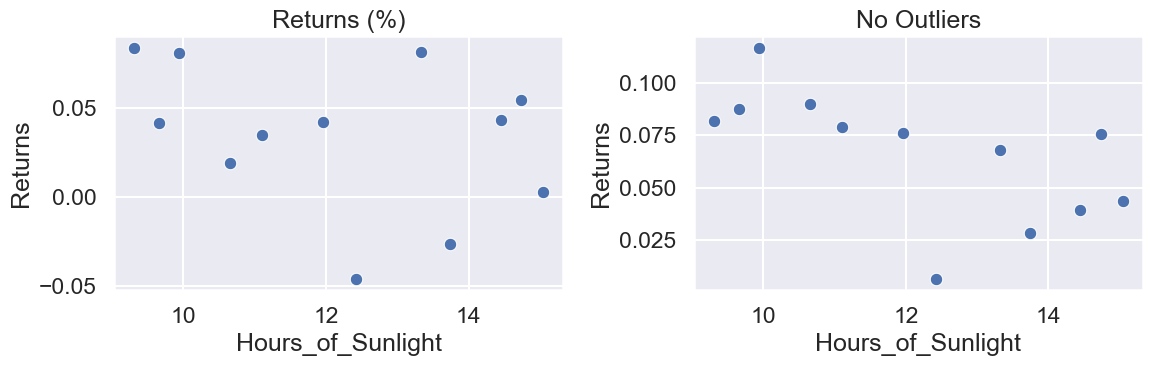

In [126]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.scatterplot(ax=axes[0], x=avg_sunlight_hours, y=avg_return)
sns.scatterplot(ax=axes[1], x=avg_sunlight_hours, y=avg_return_NO)

axes[0].set_title('Returns (%)')
axes[1].set_title('No Outliers')

plt.tight_layout()


Negative correlation between returns and hours of sunlight

In [129]:
#Store monthly information into seperate dataframe
Monthly_NYC = pd.DataFrame(avg_return)
Monthly_NYC['Avg_Returns_N/O'] = avg_return_NO
Monthly_NYC['Hours_of_Sunlight(Time)'] = avg_sunlight
Monthly_NYC['Hours_of_Sunlight(Numeric)'] = avg_sunlight_hours
Monthly_NYC.rename(columns={'Returns' :'Avg_Returns'}, inplace=True)

#.iloc to access specific months
Monthly_NYC


,Avg_Returns,Avg_Returns_N/O,Hours_of_Sunlight(Time),Hours_of_Sunlight(Numeric)
Date,,,,
1,0.042002,0.087407,0 days 09:39:17.951371571,9.654986
2,0.019312,0.089709,0 days 10:39:37.815261044,10.660504
3,0.042535,0.076085,0 days 11:57:43.722482435,11.962145
4,0.081893,0.068025,0 days 13:19:36.336645962,13.326760
5,0.043694,0.039235,0 days 14:26:51.105454545,14.447529
6,0.002745,0.043915,0 days 15:02:30.619447779,15.041839
7,0.054603,0.075412,0 days 14:44:12.521844660,14.736812
8,-0.026523,0.028508,0 days 13:44:38.703703703,13.744084
9,-0.045921,0.006832,0 days 12:25:31.863636363,12.425518


<Axes: >

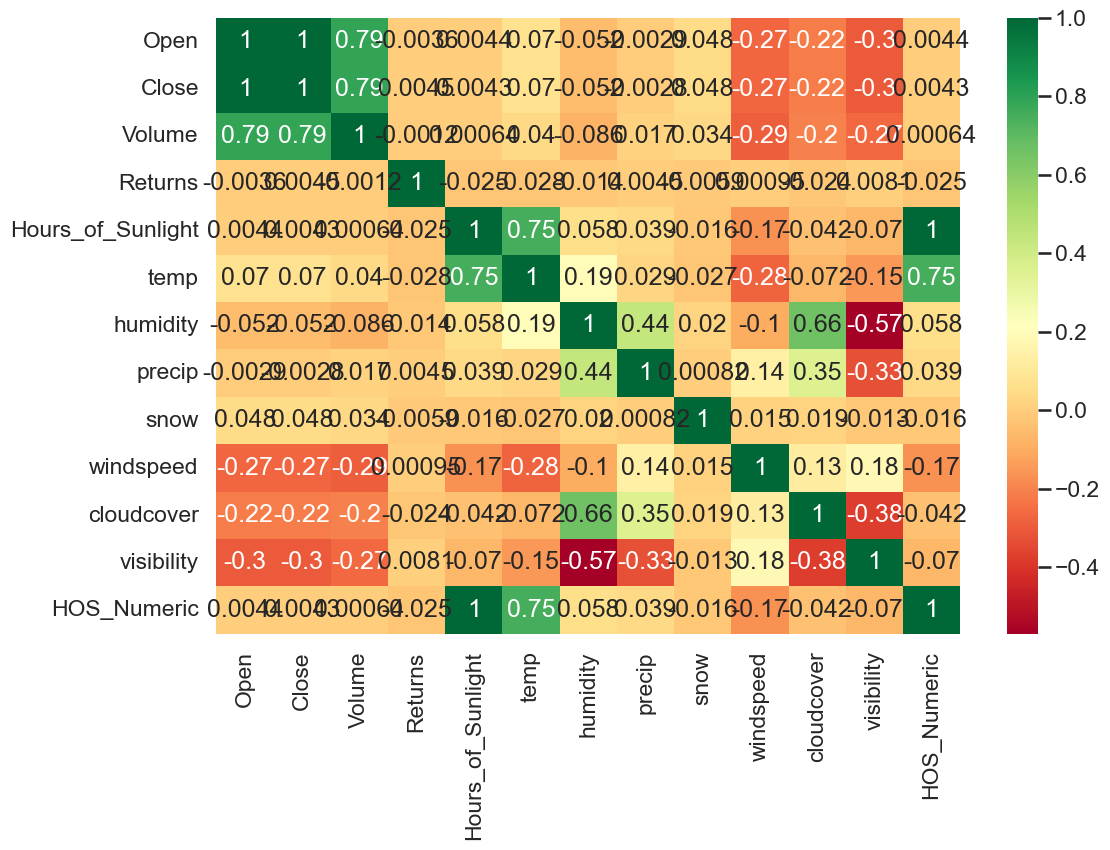

In [135]:
corr_matrix = NYC_no_outliers.select_dtypes(include=[np.float64,np.timedelta64]).corr()
corr_matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,  annot=True, cmap='RdYlGn')

<Axes: >

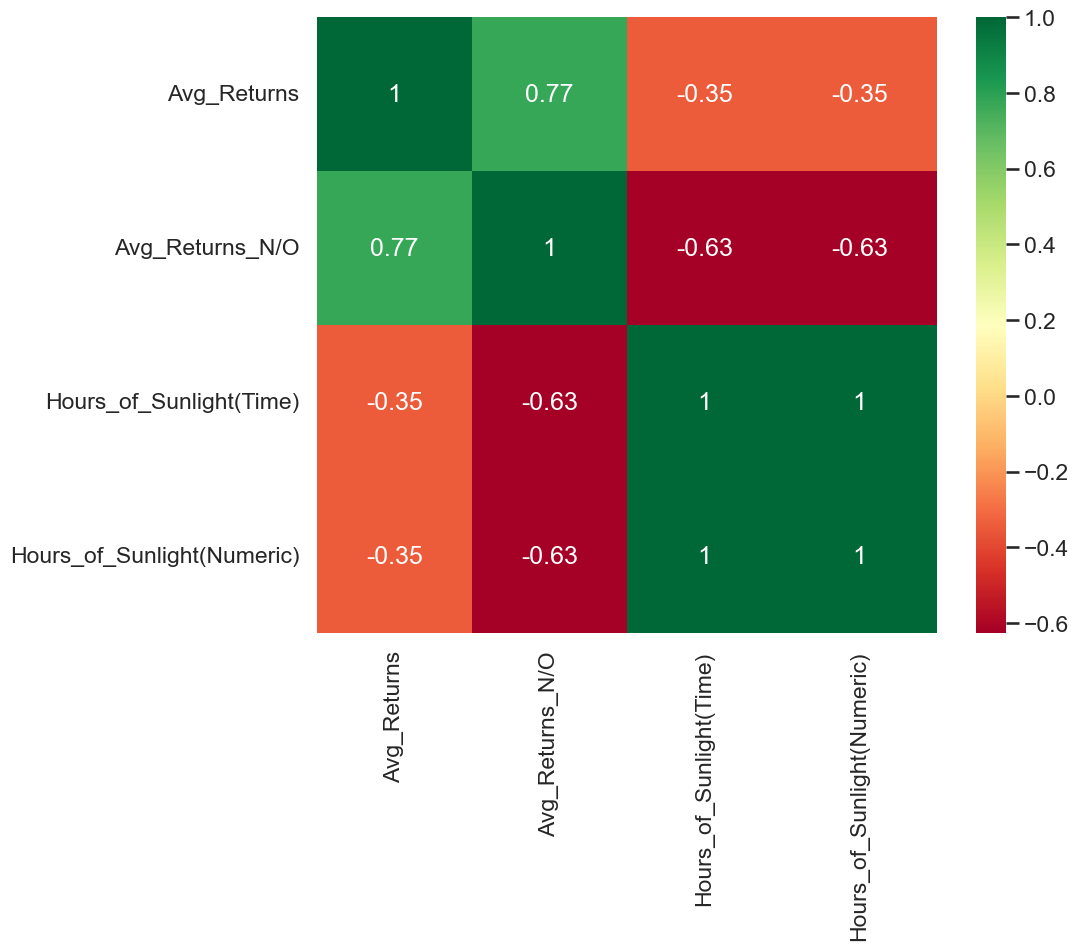

In [136]:
corr_matrix = Monthly_NYC.corr()
corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,  annot=True, cmap='RdYlGn')

Without outliers, there is a significant negative correlation between avg. monthly returns and avg. hours of sunlight

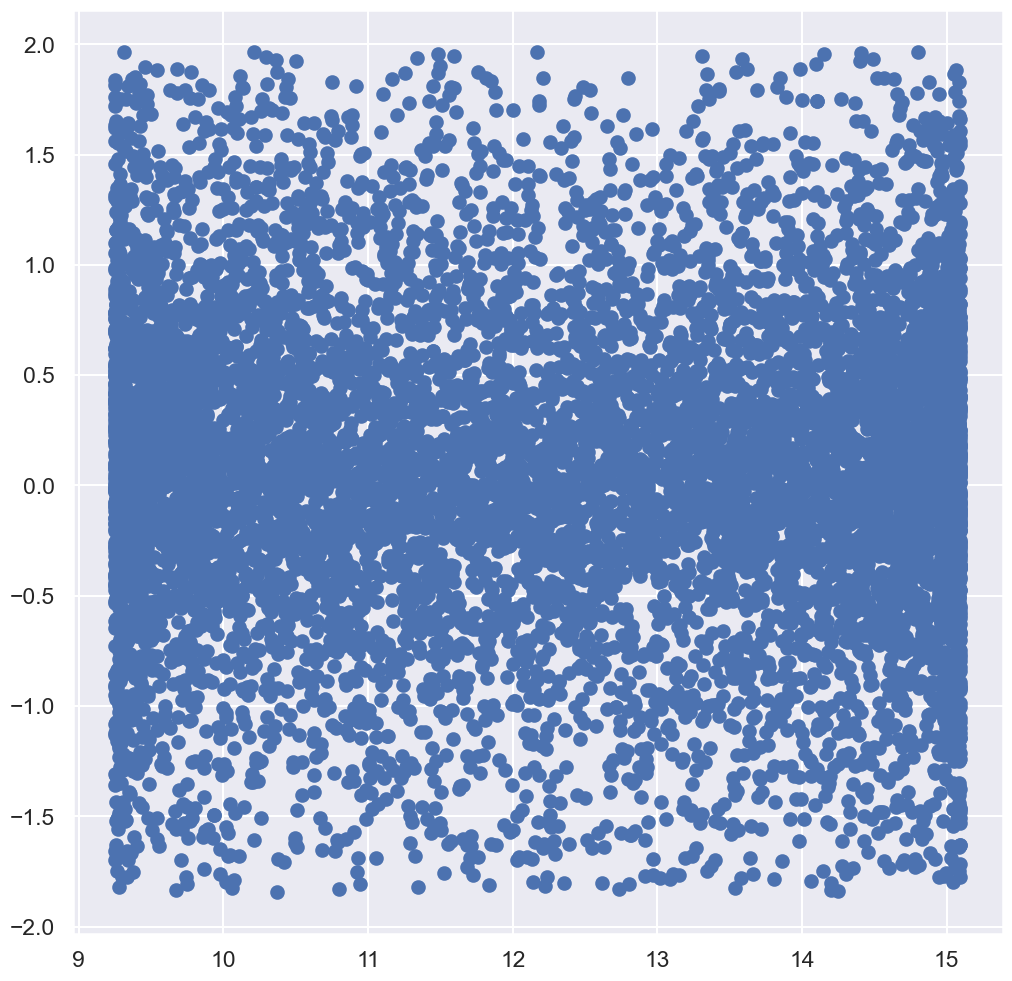

In [ ]:
"""REMOVE"""
plt.figure(figsize=(12,12))

plt.scatter(x = NYC_no_outliers['HOS_Numeric'], y=NYC_no_outliers['Returns'])

In [138]:
#Saving dataframe as .csv for later use
NYSE_Weather.to_csv('../data/NYSE_Weather.csv', index= False)
NYC_no_outliers.to_csv('../data/NYC_no_outliers.csv', index= False)
Monthly_NYC.to_csv('../data/Monthly_averages.csv', index= False)


In [131]:
import statsmodels.api as sm
y = avg_return_NO
x= avg_sunlight_hours

x = sm.add_constant(x) #adds a constant/intercept for the regression

model = sm.OLS(y, x)
regression = model.fit()

In [132]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     6.463
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0293
Time:                        18:56:13   Log-Likelihood:                 28.333
No. Observations:                  12   AIC:                            -52.67
Df Residuals:                      10   BIC:                            -51.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1793      0.04

c:\Users\l3onw\anaconda3\envs\LHL_env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from sklearn.linear_model import LinearRegression

X_train_sample = avg_sunlight_hours.values.reshape(-1, 1)

y_train_sample = avg_return_NO.values

lr_sample = LinearRegression()
lr_sample.fit(X_train_sample, y_train_sample)
lr_sample.predict(X_train_sample)[:5]

array([0.08963715, 0.08029613, 0.06820421, 0.05552727, 0.0451156 ])

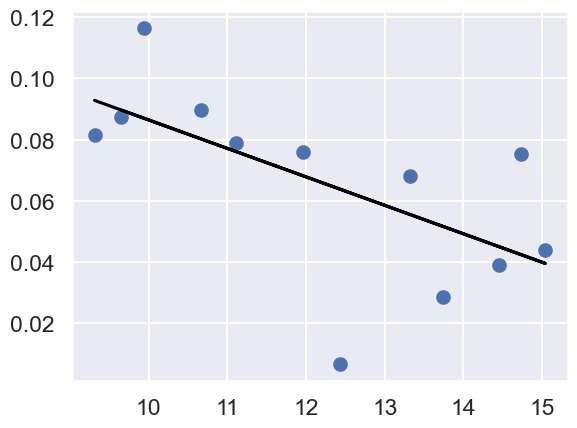

In [ ]:
plt.scatter(X_train_sample, y_train_sample)
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

In [ ]:
lr_sample.coef_

array([-0.00928976])

In [ ]:
lr_sample.intercept_

0.17932961325714336

In [ ]:
lr_sample.score(X_train_sample, y_train_sample)

0.3925700612366292

In [ ]:
NYC_no_outliers['Hours_of_Sunlight'] = pd.to_timedelta(NYC_no_outliers['Hours_of_Sunlight'])


x=NYC_no_outliers['Hours_of_Sunlight'].dt.total_seconds() / 3600
y=NYC_no_outliers['Returns']

x = sm.add_constant(x) #adds a constant/intercept for the regression

model = sm.OLS(y, x)
regression = model.fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.828
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0158
Time:                        16:31:26   Log-Likelihood:                -9990.0
No. Observations:                9158   AIC:                         1.998e+04
Df Residuals:                    9156   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1767      0.04

C:\Users\l3onw\AppData\Local\Temp\ipykernel_6952\4038582442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_no_outliers['Hours_of_Sunlight'] = pd.to_timedelta(NYC_no_outliers['Hours_of_Sunlight'])
